          X          y
0  3.745401  14.450550
1  9.507143  28.468850
2  7.319939  23.391609
3  5.986585  17.978893
4  1.560186   8.680794


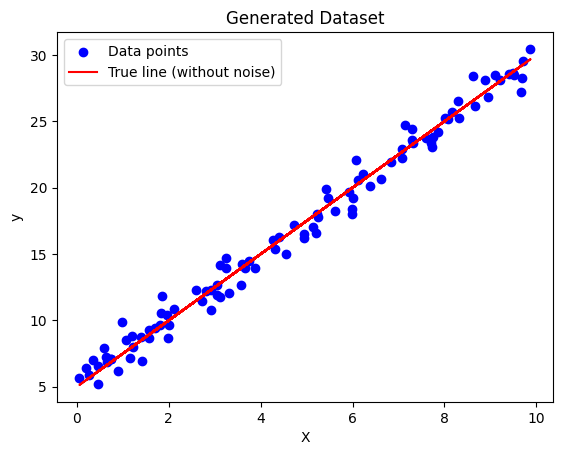

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
# Parameters for the linear relationship
m = 2.5  # Slope
c = 5    # Intercept
noise_factor = 1.0  # Noise level

# Generate random X values
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10

# Generate y values with some noise
y = m * X + c + np.random.randn(100, 1) * noise_factor

# Create a DataFrame for easier handling
data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

# Display the first few rows of the dataset
print(data.head())

# Plot the dataset
plt.scatter(data['X'], data['y'], color='b', label='Data points')
plt.plot(X, m * X + c, color='r', label='True line (without noise)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Dataset')
plt.legend()
plt.show()


In [3]:
data.head()

,X,y
0,3.745401,14.450550
1,9.507143,28.468850
2,7.319939,23.391609
3,5.986585,17.978893
4,1.560186,8.680794


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import cv2 as cv

from sklearn.metrics import mean_squared_error
import numpy as np
from abc import ABC, abstractmethod

class GradientAbstract(ABC):
    mse_ = None
    
    def __init__(self, X: np.ndarray, y: np.ndarray, lr: float = 0.01, m: float = 0.1, c: float = 0, iterations: int = 1000):
        self.X = X
        self.y = y
        self.lr = lr
        self.m = m
        self.c = c
        self.iterations = iterations

    @abstractmethod
    def MSE(self, y_pred: np.ndarray) -> float:
        pass

    @abstractmethod
    def slopeDelta(self) -> float:
        pass

    @abstractmethod
    def interceptDelta(self) -> float:
        pass

    @abstractmethod
    def predict_(self) -> np.ndarray:
        pass

    @abstractmethod
    def predict(self, X: np.ndarray) -> np.ndarray:
        pass

    @abstractmethod
    def getGradients(self) -> None:
        pass

class GradientDescent(GradientAbstract):
    
    def MSE(self, y_pred) -> float:
        self.mse_ = mean_squared_error(y_true=self.y, y_pred=y_pred)
        return self.mse_  
    
    def slopeDelta(self) -> float:
        return -2 / len(self.y) * np.sum(self.X * (self.y - (self.m * self.X + self.c)))
    
    def interceptDelta(self) -> float:
        return -2 / len(self.y) * np.sum(self.y - (self.m * self.X + self.c))
    
    def predict_(self) -> np.ndarray:
        y_pred = self.m * self.X + self.c
        return y_pred

    def predict(self, X: np.ndarray) -> np.ndarray:
        return self.m * X + self.c

    @staticmethod
    def score(y_true:np.ndarray, y_pred:np.ndarray):
        diff = []
        for i, j in zip(y_true, y_pred):
            diff.append(i -j)
        return sum(diff)
        
    def getGradients(self) -> None:
        for i in range(self.iterations):
            y_pred = self.predict_()
            mse = self.MSE(y_pred=y_pred)
            print(f"Iteration {i} | m = {self.m:.4f}, c = {self.c:.4f}, MSE = {mse:.4f}")

            delta_m = self.slopeDelta()
            delta_c = self.interceptDelta()
            
            self.m -= self.lr * delta_m
            self.c -= self.lr * delta_c

            yield self.m, self.c, self.mse_

In [ ]:
model = GradientDescent(X=X_train, y=y_train)
val = model.getGradients()
while True:
    print(val)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

